# Datasett

Når vi skal laste inn datasett kommer behovet for andre pakker enn `pylab` til å øke raskt. Derfor er det første vi skal gjøre å installere nødvendige pakker.

- `statsmodels`
- `cartopy`
- `PIL`


Det er mye snakk om data for tiden. Og visstnok skal det gå an å leve av data. Noen påstår til og med at [data er den nye oljen](https://www.dn.no/teknologi/sommerkjappe/microsoft-norge/kimberly-lein-mathisen/-data-er-den-nye-oljen/2-1-125484). 

Dette er vel og bra, men hvor er alle disse dataene? Og hvordan kan man få brukt dem til noe?

Svaret er at disse dataene finnes rundt forbi. Noe på det åpne internettet, noe bak innlogging på internett. Noe ligger bare på private servere, noe ligger på minnepenner også videre. 

Disse dataene finnes i forskjellige formater. Det kan være word-dokumenter, excel-ark, facebook-poster, bilder på instagram, bilder tatt av roveren curiosity på Mars. 

En av de fine tingene med å kunne programmere er at vi nå kan bruke slike data, og at vi ikke er så avhengige av at dataene foreligger på et spesifikt format, for vi kan klare å hente dem ut på en automatisert måte bare vi får lov til å kikke litt på dem først. 

## Eksempeldatasett

Vi begynner med noen eksempeldatasett for å trene litt på å se på data. 

Disse datasettene har den egenskapen at de ligger i et dataframe-format. Dette er litt som et regneark, slik at vi enkelt kan hente ut kolonner. 

La oss først se på et datasett fra statsmodels. Det inneholder solflekkdata. La oss si at jeg har fortalt deg at du kan hente det med `sm.datasets.sunspots.load().data`, men ikke sagt noe mer. 

In [1]:
from pylab import *
import statsmodels.api as sm
sunspots = sm.datasets.sunspots.load().data

Da må vi først sjekke hva som er i `sunspots`. Det er typisk lurt å sjekke med `type(sunspots`. Dette forteller oss at `sunspots` har type `numpy.recarray`. Dette har vi kanskje ikke hørt om før, så da må vi lete opp dokumentasjonen for denne datatypen. Google: `numpy.recarray`. Det fører oss til [scipy-dokumentasjonen](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.recarray.html). Her lærer vi først at dette er en type array, bare at man kan gi navn til elementer, ikke bare tall. Vi finner også (sannsynligvis etter litt strev) at vi kan finne navnet på disse ved å kalle på `sunspots.dtype`.

In [2]:
print(sunspots.dtype)

(numpy.record, [('YEAR', '<f8'), ('SUNACTIVITY', '<f8')])


Dermed bør vi kunne titte på dataene ved å kalle på `sunspots["YEAR"]` eller `sunspots["SUNACTIVITY"]`.

In [3]:
sunspots["YEAR"]

array([1700., 1701., 1702., 1703., 1704., 1705., 1706., 1707., 1708.,
       1709., 1710., 1711., 1712., 1713., 1714., 1715., 1716., 1717.,
       1718., 1719., 1720., 1721., 1722., 1723., 1724., 1725., 1726.,
       1727., 1728., 1729., 1730., 1731., 1732., 1733., 1734., 1735.,
       1736., 1737., 1738., 1739., 1740., 1741., 1742., 1743., 1744.,
       1745., 1746., 1747., 1748., 1749., 1750., 1751., 1752., 1753.,
       1754., 1755., 1756., 1757., 1758., 1759., 1760., 1761., 1762.,
       1763., 1764., 1765., 1766., 1767., 1768., 1769., 1770., 1771.,
       1772., 1773., 1774., 1775., 1776., 1777., 1778., 1779., 1780.,
       1781., 1782., 1783., 1784., 1785., 1786., 1787., 1788., 1789.,
       1790., 1791., 1792., 1793., 1794., 1795., 1796., 1797., 1798.,
       1799., 1800., 1801., 1802., 1803., 1804., 1805., 1806., 1807.,
       1808., 1809., 1810., 1811., 1812., 1813., 1814., 1815., 1816.,
       1817., 1818., 1819., 1820., 1821., 1822., 1823., 1824., 1825.,
       1826., 1827.,

Vi kan så plotte dette datasettet. 

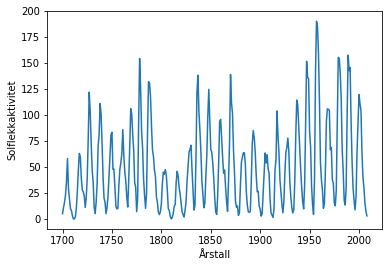

In [4]:
plot(sunspots["YEAR"], sunspots["SUNACTIVITY"])
xlabel("Årstall")
ylabel("Solflekkaktivitet")
show()

---
### Underveisoppgave
Det finnes et datasett som heter `nile` og som i form likner på solflekk-datasettet. Dette skal la seg laste inn ved å bytte ut ordet `sunspots`med `nile`. 

**a)** Sjekk typen på datasettet `nile`, og prøv å finne ut av hva det kan være for noe.   
**b)** Lag et relevant plott av datasettet. 

---

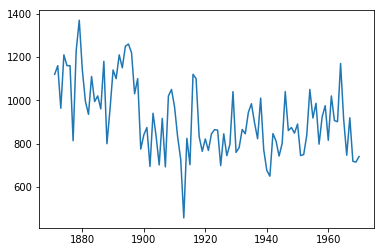

In [5]:
nile = sm.datasets.nile.load().data
figure()
plot(nile["year"], nile["volume"]) # giga-kubikkmeter vannføring i nilen, et eller annet sted. 
show()

---
### Underveisoppgave
Det finnes et annet datasett som heter `elnino` og som er litt annerledes. Dette skal la seg laste inn ved å bytte ut ordet `nile`med `elnino`. 

**a)** Finn ut av hva som er i datasettet `elnino`, og beskriv datasettet overfladisk.     
**b)** Klarer du å lage en eller annen grafisk framstilling av dette datasettet?

---

(numpy.record, [('YEAR', '<f8'), ('JAN', '<f8'), ('FEB', '<f8'), ('MAR', '<f8'), ('APR', '<f8'), ('MAY', '<f8'), ('JUN', '<f8'), ('JUL', '<f8'), ('AUG', '<f8'), ('SEP', '<f8'), ('OCT', '<f8'), ('NOV', '<f8'), ('DEC', '<f8')])


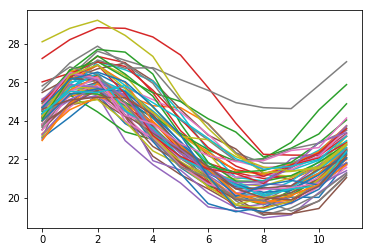

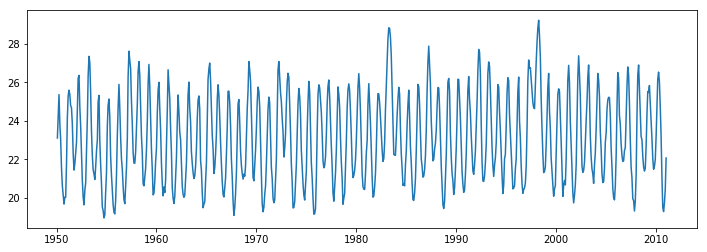

In [6]:
elnino = sm.datasets.elnino.load().data
print(elnino.dtype)

figure()
temperatures = []
for entry in elnino:
    yearly_data = entry.tolist()[1:]
    plot(yearly_data)
    temperatures.extend(entry.tolist()[1:])

figure(figsize = (12,4))
import pandas as pd
dates = pd.date_range('1/1/'+str(int(elnino.YEAR[0])), periods=len(temperatures), freq="M")
plot(dates, temperatures)

## Datasett vha API (Application programming interface)

I resten av denne økta øker vi tempoet, og det er ikke meningen at du skal henge med på detaljene umiddelbart. Dette er mer ment som en demonstrasjon av noen typer muligheter som finnes for henting av data fra profesjonelle datatilbydere. 

Når vi skal hente inn datasett er det som regel noen besvergelser som er spesifikke for den datakilden eller det datasettet man skal se på. Men det er også en del som er generelt, og som man etterhvert kan kjenne igjen. Dette handler om at man ber om noe data med noen spesifikasjoner på de dataene, for eksempel en innsamlingsdato. I denne økta skal vi se på hvordan vi kan hente bilder som er tatt av Mars-roveren Curiosity, og hvordan vi kan finne ut hvilke asteroider som passerer nærme jorda neste uke, og plotte hvor langt unna og hvor fort de er estimert å passere. 

Siden det er noen besvergelser involvert i datahenting, så kommer vi til å akseptere at det er noe magi i denne økta, altså kode som dere ikke trenger å forstå hvordan fungerer. 

## Følg den internasjonale romstasjonen

Dette viser et enkelt API (Application programming interface) som leverer data i json-format. Dette er et veldig vanlig format for data man henter gjennom et API. 

In [7]:
from pylab import *
import requests
import json

obj = requests.get("http://api.open-notify.org/iss-now.json")
obj = obj.json()
print(obj)

print(obj['iss_position']['longitude'], obj['iss_position']['latitude'])


{'timestamp': 1548188507, 'message': 'success', 'iss_position': {'latitude': '38.0531', 'longitude': '78.4306'}}
78.4306 38.0531


## Mars-roveren curiosity

NASA legger ut mange gratis datasett. Om man vil utforske dette er nettsiden data.nasa.gov et fint sted. Akkurat nå skal vi nøye oss med å se på data fra Mars-roveren curiosity. 

> Dersom man gjør mange spørringer mot NASA kan det hende man etterhvert blir blokkert. Da kan man registrere seg gratis for å få lov til å hente mer data. 

In [8]:
import datetime

today = datetime.date(2019, 1, 12)
tomorrow = today+datetime.timedelta(days=1)
dato = str(datetime.date(2018,6,9))

In [9]:
import requests

def se_etter_bilder(dato):
    query_props = {"earth_date": str(dato), "camera": "mast",  "api_key": "ozRU4dVjr1DUGdfTkbomh49Ip0CtguJsUAtMcyZw"}
    query_address = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?" + "&".join([key + "=" + value for key, value in query_props.items()])
    response = requests.get(query_address)
    data = response.json()
    num_photos = len(data["photos"])
    return data

num_photos = 0
dato = datetime.date(2018, 9, 16)
while num_photos == 0:
    data = se_etter_bilder(dato)
    num_photos = len(data["photos"])
    print("Det er %d bilder fra" % num_photos, str(dato))
    dato -= datetime.timedelta(days=1)
    
    
    

Det er 41 bilder fra 2018-09-16


Dette gir oss en tekst. Nå er det opp til oss å tolke denne teksten på en fornuftig måte. Vi vet på forhånd at dette datasettet kommer i *json*-format. Derfor leser vi det inn med json-pakken i python. Funksjoner `json.loads` tolker en streng som en fil i json format, og returnerer innholdet i denne strengen som en *dictionary*. Det er ikke sentralt å forstå alt dette akkurat nå, men vi må nesten skrive det opp allikevel. 

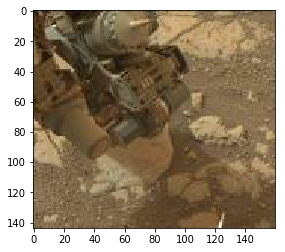

In [19]:
from pylab import *
from PIL import Image
photo_info = data["photos"]

dates = []
entry = photo_info[4]
image_data = requests.get(entry["img_src"], stream=True)
image_data.raw.decode_content = True
image = Image.open(image_data.raw)
imshow(image)

## NASA: Asteroider

Nasa følger med på asteroider, og rapporterer alle som kommer i nærheten av jorda.

Neste uke er det følgende asteroider det er snakk om:

In [20]:
query_props = {"start_date": str(datetime.date(2019,1,22)),  "api_key": "ozRU4dVjr1DUGdfTkbomh49Ip0CtguJsUAtMcyZw"}
query_address = "https://api.nasa.gov/neo/rest/v1/feed?" + "&".join([key + "=" + value for key, value in query_props.items()])
results = requests.get(query_address).json()

Text(0.5,1,'Nære asteroider neste uke')

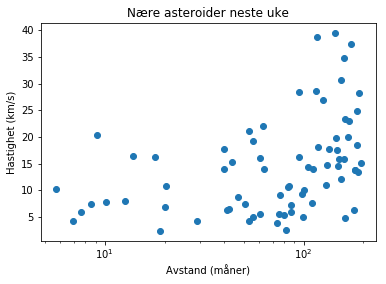

In [21]:
objects = results["near_earth_objects"]

distances = []
velocities = []
for key, value in objects.items():
    for asteroide in value:
        distance = asteroide['close_approach_data'][0]["miss_distance"]["lunar"]
        velocity = asteroide['close_approach_data'][0]["relative_velocity"]["kilometers_per_second"]
        distances.append(float(distance))
        velocities.append(float(velocity))

semilogx(distances, velocities, 'o')
plt.xlabel("Avstand (måner)")
plt.ylabel("Hastighet (km/s)")
plt.title("Nære asteroider neste uke")